In [60]:
import json
import datetime
import collections
import pprint

import numpy as np
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot
import bokeh.models
import bokeh.plotting
import bokeh.io

In [12]:
with open('leaderboard/12-20_13.json') as f:
    leaderboard = json.load(f)

In [13]:
Completion = collections.namedtuple('Completion', ('name', 'completion_time'))

puzzle_completions = collections.defaultdict(list)

for member in leaderboard["members"].values():
    name = member["name"]
    for day, parts in member["completion_day_level"].items():
        for part, obj in parts.items():
            completion_time = datetime.datetime.fromtimestamp(obj["get_star_ts"])
            puzzle_completions[(int(day), int(part))].append(Completion(name, completion_time))

#puzzle_completions

In [14]:
completion_by_time = []

for (day, part), completions in puzzle_completions.items():
    awarded_points = range(len(leaderboard["members"]), 0, -1)
    completions.sort(key=lambda c: c.completion_time)
    for points, (name, completion_time) in zip(awarded_points, completions):
        completion_by_time.append((completion_time, name, (day, part), points))

completion_by_time.sort()
#completion_by_time

In [15]:
score_history = collections.defaultdict(list)
running_scores = collections.defaultdict(int)

for time, name, _problem, points in completion_by_time:
    running_scores[name] += points
    score_history[name].append((time, running_scores[name]))

#score_history

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

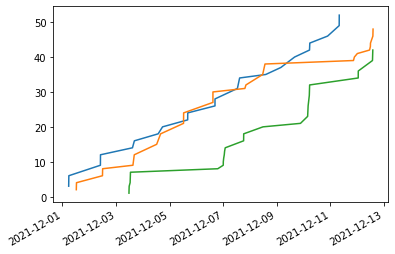

In [16]:
series = {}

for name, player in score_history.items():
    timestamps, acc_score = zip(*player)
    time_index = pd.to_datetime(timestamps)
    series[name] = pd.Series(acc_score, index=time_index)

[player_hist.plot() for player_hist in series.values()]

In [17]:
df = pd.DataFrame(series)
dff = df.ffill().fillna(0)
dff

,diogotito,pedrogranja,diogoalmiro
2021-12-01 05:36:23,3.0,0.0,0.0
2021-12-01 05:44:24,6.0,0.0,0.0
2021-12-01 12:25:57,6.0,2.0,0.0
2021-12-01 12:35:37,6.0,4.0,0.0
2021-12-02 10:01:24,9.0,4.0,0.0
...,...,...,...
2021-12-12 11:59:49,52.0,44.0,36.0
2021-12-12 13:47:12,52.0,44.0,39.0
2021-12-12 14:04:33,52.0,44.0,42.0
2021-12-12 14:08:14,52.0,46.0,42.0


<AxesSubplot:>

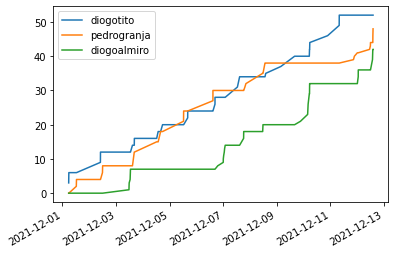

In [18]:
dff.plot()

In [70]:
dff.plot_bokeh.line(
    figsize=(1000, 500),
    title="Advent of Code 2021 - Private Leaderboard score evolution",
    xlabel="Time of completion",
    ylabel="Local score",
    yticks=range(0, 50, 10),
    ylim=(0, 50),
    #xticks=[]     # =range(1, 10000000000000, 100000000),
    xlim=("2021-12-01", "2021-12-25"),
    colormap=["red", "blue", "green"],
    marker="star")

Figure(id='17974', ...)

In [110]:
bokeh.io.curdoc().theme = None  # "night_sky"

source_scatter = bokeh.models.ColumnDataSource(df)
source_lines = bokeh.models.ColumnDataSource(dff)
plot = bokeh.plotting.figure(
    title="Advent of Code 2021 - Private Leaderboard score evolution",
    x_axis_type="datetime",
    x_axis_label="Time of completion",
    x_range=(datetime.datetime(2021, 12, 1), datetime.datetime(2021, 12, 25)),
    x_minor_ticks=2,
    y_axis_label="Local score",
    plot_width=1200,
    plot_height=600
)

plot.xaxis.formatter = bokeh.models.DatetimeTickFormatter(days=["Day %d"])
plot.xaxis.ticker = bokeh.models.DaysTicker(days=list(range(1, 26)), desired_num_ticks=6, num_minor_ticks=3)

categories = ["diogotito", "diogoalmiro", "pedrogranja"]
colors = {"diogotito": "green", "diogoalmiro": "blue", "pedrogranja": "red"}

for category in categories:
    plot.scatter(x='index', y=category, source=source_scatter, size=15, fill_color=colors[category], legend_label=category, marker="star")                                                                                                       
    plot.line(x='index', y=category, source=source_lines, line_color=colors[category])

#from bokeh.io import output_file, show
bokeh.io.show(plot)